In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore')

In [3]:
rcParams['figure.figsize'] = (12,5)
rcParams['lines.linewidth'] = 2
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12

In [4]:
df = pd.read_csv('C:/Ramlan/Rakamin Bootcamp/Final Project/train.csv')

In [5]:
df.sample(1)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
220496,220497,Female,25,1,8.0,1,< 1 Year,No,26498.0,152.0,113,0


In [6]:
# data type formatting
df['Driving_License'] = df['Driving_License'].astype(str)
df['Region_Code'] = df['Region_Code'].astype(str)
df['Previously_Insured'] = df['Previously_Insured'].astype(str)
df['Policy_Sales_Channel'] = df['Policy_Sales_Channel'].astype(str)
df['Response'] = df['Response'].astype(str)

In [7]:
# filter dataset yang hanya tertarik asuransi kendaraan
df_filtered = df[df['Response']=='1']

In [8]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46710 entries, 0 to 381097
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    46710 non-null  int64  
 1   Gender                46710 non-null  object 
 2   Age                   46710 non-null  int64  
 3   Driving_License       46710 non-null  object 
 4   Region_Code           46710 non-null  object 
 5   Previously_Insured    46710 non-null  object 
 6   Vehicle_Age           46710 non-null  object 
 7   Vehicle_Damage        46710 non-null  object 
 8   Annual_Premium        46710 non-null  float64
 9   Policy_Sales_Channel  46710 non-null  object 
 10  Vintage               46710 non-null  int64  
 11  Response              46710 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 4.6+ MB


In [9]:
# Membagi dataset menjadi numericals dan categories
numericals = ['Age', 'Annual_Premium', 'Vintage']
categories = ['Gender', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel', 'Response']

## Visualisasi data dengan tipe numeric

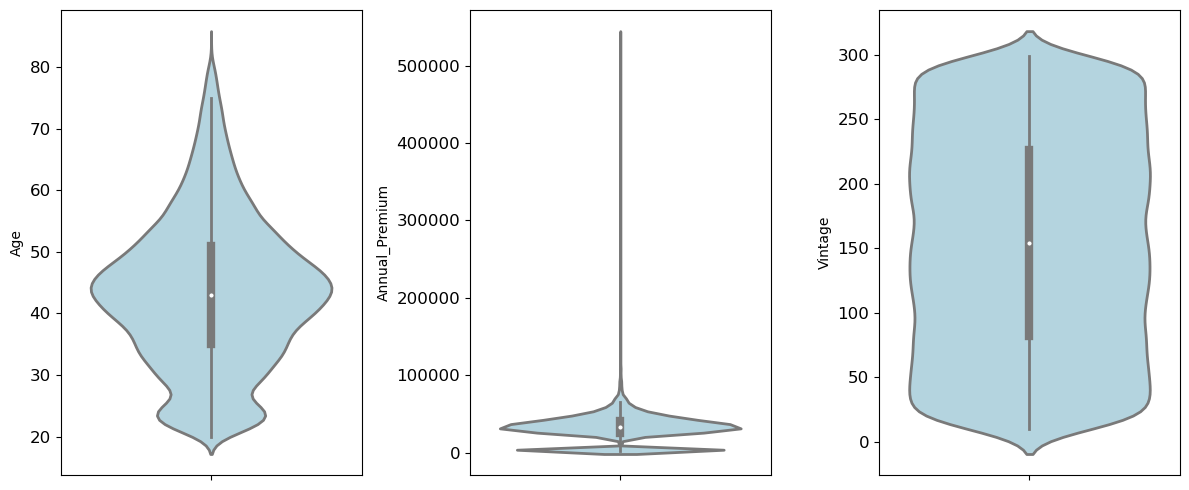

In [10]:
for i in range(0, len(numericals)):
    plt.subplot(1, 3, i+1)
    sns.violinplot(y=df_filtered[numericals[i]], color='lightblue')
    plt.tight_layout()

Dari visualisasi di atas dapat disimpulkan bahwa seluruh customer yang tertarik dengan asuransi kendaraan memiliki Premi Tahunan di bawah 100.000 pada asuransi kesehatan, serta sebagian besar berada di rentang usia antara 40-50 tahun.

## Visualisasi dengan tipe kategorik

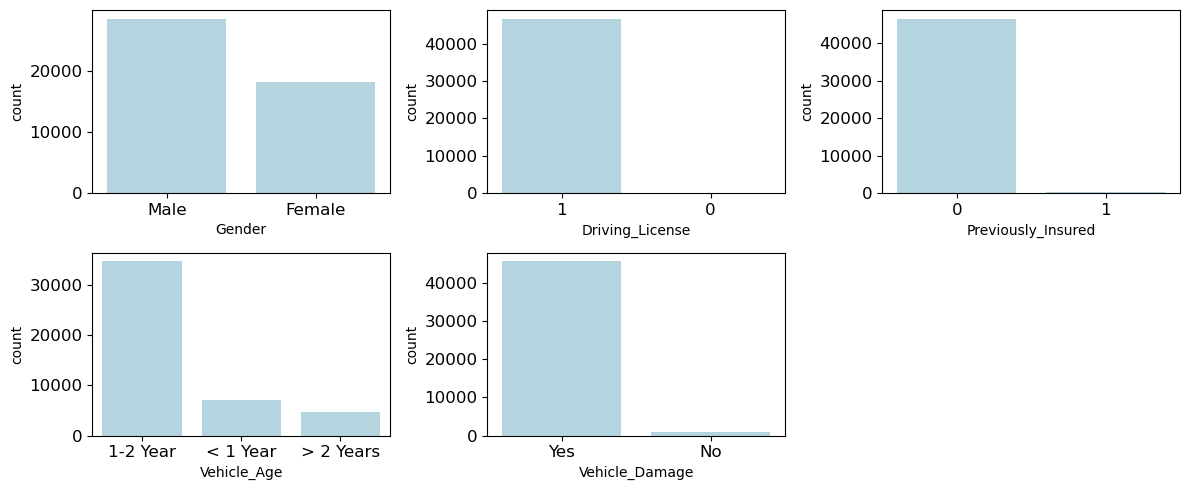

In [11]:
categories_fitered = ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage']
for index, row in enumerate(categories_fitered):
    value_counts = df_filtered[categories_fitered[index]].value_counts().reset_index()
    plt.subplot(2, 3, index+1)
    sns.barplot(data=value_counts, x=row, y='count', color='lightblue')
    plt.tight_layout()

Hasil visualisasi pada tipe kategorik menunjukkan bahwa sebagian besar customer yang tertarik dengan asuransi kendaraan adalah **customer pria**, memiliki kendaraan dengan **umur kendaraan antara 1-2 tahun**, serta **pernah mengalami kerusakan pada kendaraan**. 
Selain itu, dapat disimpulkan juga bahwa *seluruh* customer yang tertarik dengan asuransi kendaraan telah **memiliki lisensi berkendara**, serta **belum memiliki asuransi kendaraan sebelumnya**.

## Region Code dan Policy Sales Channel

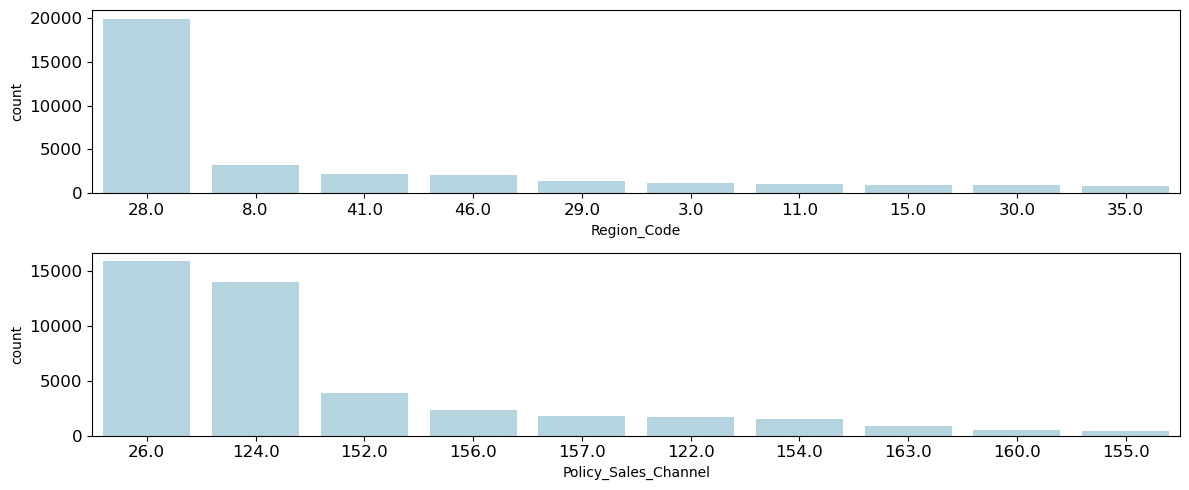

In [12]:
# Top 10 Region Code dan Policy Sales Channel
top10_Region_Code = df_filtered['Region_Code'].value_counts().reset_index().head(10)
top10_Policy_Sales_Channel = df_filtered['Policy_Sales_Channel'].value_counts().reset_index().head(10)

plt.subplot(2, 1, 1)
sns.barplot(data=top10_Region_Code, x='Region_Code', y='count', color='lightblue')

plt.subplot(2, 1, 2)
sns.barplot(data=top10_Policy_Sales_Channel, x='Policy_Sales_Channel', y='count', color='lightblue')
plt.tight_layout()

In [13]:
# Total customers berdasarkan Region dan Response
region_response = df.groupby(['Region_Code', 'Response'])['id'].count().reset_index()
region_response

,Region_Code,Response,id
0,0.0,0,1847
1,0.0,1,174
2,1.0,0,899
3,1.0,1,109
4,10.0,0,4111
...,...,...,...
101,7.0,1,432
102,8.0,0,30620
103,8.0,1,3257
104,9.0,0,2848


In [14]:
# Total customer yang tertarik berdasarkan Region
interested_by_region = region_response[region_response['Response']=='1']
interested_by_region.columns = ['Region_Code', 'Response', 'Total_Interested_Customers']

# Total customer berdasarkan Region
total_by_region = region_response.groupby('Region_Code')['id'].sum().reset_index()
total_by_region.columns = ['Region_Code', 'Total_Customers']

In [15]:
# Persentase customer yang tertarik berdasarkan Region
merge_region = interested_by_region.merge(total_by_region, on='Region_Code', how='inner')
merge_region['Percentage'] = round(merge_region['Total_Interested_Customers'] / merge_region['Total_Customers'], 3) * 100

In [17]:
sorted_merge_region

,Region_Code,Response,Total_Interested_Customers,Total_Customers,Percentage
32,38.0,1,389,2026,19.2
21,28.0,1,19917,106415,18.7
11,19.0,1,250,1535,16.3
34,4.0,1,285,1801,15.8
16,23.0,1,300,1960,15.3
47,51.0,1,28,183,15.3
17,24.0,1,342,2415,14.2
50,7.0,1,432,3279,13.2
10,18.0,1,678,5153,13.2
23,3.0,1,1181,9251,12.8


In [18]:
# Total customer berdasarkan Policy Sales Channel dan Response
channel_response = df.groupby(['Policy_Sales_Channel', 'Response'])['id'].count().reset_index()
channel_response

,Policy_Sales_Channel,Response,id
0,1.0,0,1039
1,1.0,1,35
2,10.0,0,214
3,10.0,1,50
4,100.0,0,6
...,...,...,...
269,97.0,0,12
270,97.0,1,1
271,98.0,0,20
272,98.0,1,1


In [19]:
# Total customer yang tertarik berdasarkan Policy Sales Channel
interested_by_channel = channel_response[channel_response['Response']=='1']
interested_by_channel.columns = ['Policy_Sales_Channel', 'Response', 'Interested_Customers']

# Total customer berdasarkan Policy Sales Channel
total_by_channel = channel_response.groupby('Policy_Sales_Channel')['id'].sum().reset_index()
total_by_channel.columns = ['Policy_Sales_Channel', 'Total_Customers']

# Persentase customer yang tertarik berdasarkan Policy Sales Channel
merge_channel = interested_by_channel.merge(total_by_channel, on='Policy_Sales_Channel', how='inner')
merge_channel['Percentage'] = round(merge_channel['Interested_Customers'] / merge_channel['Total_Customers'],3) * 100
merge_channel = merge_channel.sort_values(by='Total_Customers', ascending=False).head(10)
merge_channel = merge_channel.sort_values(by='Percentage', ascending=False)
merge_channel

,Policy_Sales_Channel,Response,Interested_Customers,Total_Customers,Percentage
53,163.0,1,880,2893,30.4
48,157.0,1,1794,6684,26.8
45,154.0,1,1474,5993,24.6
47,156.0,1,2297,10661,21.5
64,26.0,1,15891,79700,19.9
21,124.0,1,13996,73995,18.9
19,122.0,1,1720,9930,17.3
42,151.0,1,122,3885,3.1
43,152.0,1,3858,134784,2.9
52,160.0,1,475,21779,2.2


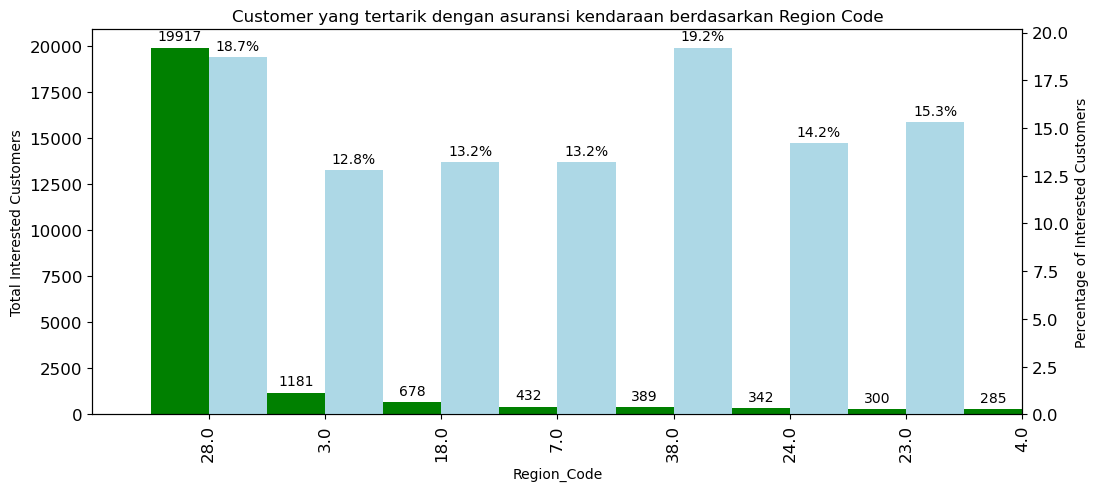

In [46]:
sorted_merge_region1 = sorted_merge_region.sort_values(by='Total_Interested_Customers', ascending=False)
sorted_merge_region1 = sorted_merge_region1.set_index('Region_Code')
fig = plt.figure(figsize=(12,5))

ax = fig.add_subplot(111)  # create matplotlib axes
ax2 = ax.twinx()  # create another axes that shares the same x-axis

bars1 = sorted_merge_region1.Total_Interested_Customers.plot(kind='bar', color='green', ax=ax, position=1, label='Total Interested Customers')
bars2 = sorted_merge_region1.Percentage.plot(kind='bar', color='lightblue', ax=ax2, position=0, label='Percentage of Interested Customers')

ax.set_ylabel('Total Interested Customers')
ax2.set_ylabel('Percentage of Interested Customers')

ax.set_xlim(-1, 7)

# Menambahkan label data pada masing-masing bar pada plot pertama (Total Interested Customers)
for bar in bars1.patches:
    height = bar.get_height()
    ax.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

# Menambahkan label data pada masing-masing bar pada plot kedua (Percentage of Interested Customers) dan round to 1 decimal place
for bar in bars2.patches:
    height = bar.get_height()
    ax2.annotate(f'{height:.1f}%', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

plt.title('Customer yang tertarik dengan asuransi kendaraan berdasarkan Region Code')
plt.show()


Dari visualisasi di atas dapat disimpulkan bahwa **Region Code 28** memiliki total customer yang tertarik dengan asuransi kendaraan tertinggi dibanding Region Code lain. Yaitu sebanyak **19.917** customers atau **18.7%** dari total customer di Region tersebut.

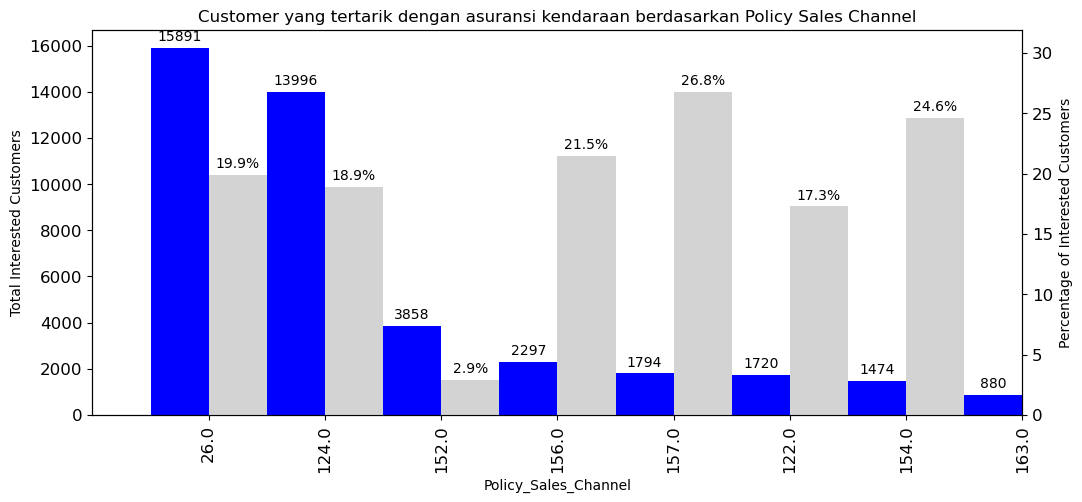

In [64]:
merge_channel = merge_channel.reset_index()
merge_channel = merge_channel.sort_values(by='Interested_Customers', ascending=False)
merge_channel = merge_channel.set_index('Policy_Sales_Channel')
fig = plt.figure(figsize=(12,5))

ax = fig.add_subplot(111)  # create matplotlib axes
ax2 = ax.twinx()  # create another axes that shares the same x-axis

bars1 = merge_channel.Interested_Customers.plot(kind='bar', color='blue', ax=ax, position=1, label='Total Interested Customers')
bars2 = merge_channel.Percentage.plot(kind='bar', color='lightgrey', ax=ax2, position=0, label='Percentage of Interested Customers')

ax.set_ylabel('Total Interested Customers')
ax2.set_ylabel('Percentage of Interested Customers')

ax.set_xlim(-1, 7)

# Menambahkan label data pada masing-masing bar pada plot pertama (Total Interested Customers)
for bar in bars1.patches:
    height = bar.get_height()
    ax.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

# Menambahkan label data pada masing-masing bar pada plot kedua (Percentage of Interested Customers) dan round to 1 decimal place
for bar in bars2.patches:
    height = bar.get_height()
    ax2.annotate(f'{height:.1f}%', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

plt.title('Customer yang tertarik dengan asuransi kendaraan berdasarkan Policy Sales Channel')
plt.show()


Dari hasil visualisasi di atas, dapat disimpulkan bahwa Channel yang memiliki total customer yang tertarik dengan asuransi kendaraan tertinggi adalah **Channel 26**, yaitu sebanyak **15.891** customers atau **19.9%** dari total customer yang ditawarkan melalui channel tersebut.

Dari segi proporsi, **Channel 157** adalah yang tertinggi. Sebesar **26,8%** customer yang ditawarkan melalui channel tersebut, atau sebanyak **1.794**, tertarik untuk berlangganan asuransi kendaraan.

## Driving License dan Previously Insured

In [85]:
#convert driving license to yes no
df_filtered['Driving_License'] = df_filtered['Driving_License'].replace({0: 'No', 1: 'Yes'})

#convert previously insured to yes no
df_filtered['Previously_Insured'] = df_filtered['Previously_Insured'].replace({0: 'No', 1: 'Yes'})
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46710 entries, 0 to 381097
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    46710 non-null  int64  
 1   Gender                46710 non-null  object 
 2   Age                   46710 non-null  int64  
 3   Driving_License       46710 non-null  object 
 4   Region_Code           46710 non-null  object 
 5   Previously_Insured    46710 non-null  object 
 6   Vehicle_Age           46710 non-null  object 
 7   Vehicle_Damage        46710 non-null  object 
 8   Annual_Premium        46710 non-null  float64
 9   Policy_Sales_Channel  46710 non-null  object 
 10  Vintage               46710 non-null  int64  
 11  Response              46710 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 4.6+ MB


In [87]:
# 1. vintage group
df_filtered['Vintage_group'] = pd.cut(df_filtered['Vintage'],bins=[0,82,154,227,300], labels=['not-long-ago','long-enough','long','very-long'])

# 2. annual premium group
df_filtered['Annual_Premium_group'] = pd.cut(df_filtered['Annual_Premium'],bins=[0,24405,31669,39400,540165], labels=['low','medium','high','very-high'])

# 3. Combine driving license to vehicle damage
df_filtered['DrivingLicense_VehicleDamage'] = df_filtered['Driving_License'].astype(str) + '_' + df_filtered['Vehicle_Damage'].astype(str)

# 4. Combine previously insured to vehicle damage
df_filtered['PrevInsured_VehicleDamage'] = df_filtered['Previously_Insured'].astype(str) + '_' + df_filtered['Vehicle_Damage'].astype(str)

# 5. Combine annual premium to previously insured
df_filtered['AnnualPremium_PreviouslyInsured'] = df_filtered['Annual_Premium_group'].astype(str) + '_' + df_filtered['Previously_Insured'].astype(str)

# 6. Combine vehicle age to vehicle damage
df_filtered['VehicleAge_VehicleDamage'] = df_filtered['Vehicle_Age'].astype(str) + '_' + df_filtered['Vehicle_Damage'].astype(str)


df_filtered

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vintage_group,Annual_Premium_group,DrivingLicense_VehicleDamage,PrevInsured_VehicleDamage,AnnualPremium_PreviouslyInsured,VehicleAge_VehicleDamage
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,long,very-high,1_Yes,0_Yes,very-high_0,> 2 Years_Yes
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,not-long-ago,high,1_Yes,0_Yes,high_0,> 2 Years_Yes
7,8,Female,56,1,28.0,0,1-2 Year,Yes,32031.0,26.0,72,1,not-long-ago,high,1_Yes,0_Yes,high_0,1-2 Year_Yes
10,11,Female,47,1,35.0,0,1-2 Year,Yes,47576.0,124.0,46,1,not-long-ago,very-high,1_Yes,0_Yes,very-high_0,1-2 Year_Yes
15,16,Male,37,1,6.0,0,1-2 Year,Yes,2630.0,156.0,147,1,long-enough,low,1_Yes,0_Yes,low_0,1-2 Year_Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381057,381058,Male,40,1,46.0,0,1-2 Year,Yes,27508.0,26.0,189,1,long,medium,1_Yes,0_Yes,medium_0,1-2 Year_Yes
381061,381062,Female,41,1,28.0,0,1-2 Year,Yes,37377.0,124.0,99,1,long-enough,high,1_Yes,0_Yes,high_0,1-2 Year_Yes
381073,381074,Female,46,1,28.0,0,1-2 Year,Yes,34741.0,124.0,167,1,long,high,1_Yes,0_Yes,high_0,1-2 Year_Yes
381075,381076,Female,61,1,28.0,0,1-2 Year,Yes,43875.0,26.0,139,1,long-enough,very-high,1_Yes,0_Yes,very-high_0,1-2 Year_Yes


## Visualisasi

In [89]:
df_filtered['DrivingLicense_VehicleDamage'].value_counts()

DrivingLicense_VehicleDamage
1_Yes    45687
1_No       982
0_Yes       41
Name: count, dtype: int64

In [91]:
counts = df_filtered.groupby(['Driving_License', 'Vehicle_Damage']).size().unstack(fill_value=0)

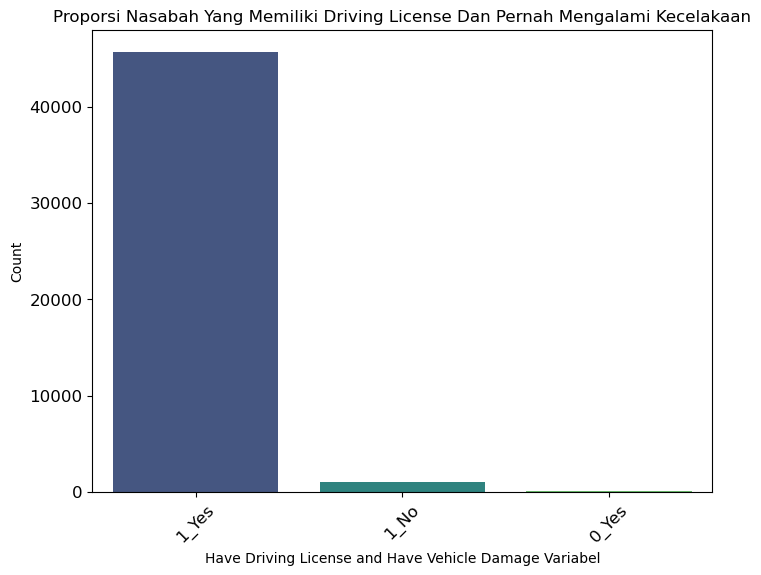

In [92]:
counts = df_filtered['DrivingLicense_VehicleDamage'].value_counts().reset_index()
counts.columns = ['DrivingLicense_VehicleDamage', 'Count']

# Membuat diagram batang menggunakan Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(data=counts, x='DrivingLicense_VehicleDamage', y='Count', palette='viridis')

plt.xlabel('Have Driving License and Have Vehicle Damage Variabel')
plt.ylabel('Count')
plt.title('Proporsi Nasabah Yang Memiliki Driving License Dan Pernah Mengalami Kecelakaan')
plt.xticks(rotation=45)

plt.show()

In [93]:
df_filtered['PrevInsured_VehicleDamage'].value_counts()

PrevInsured_VehicleDamage
0_Yes    45642
0_No       910
1_Yes       86
1_No        72
Name: count, dtype: int64

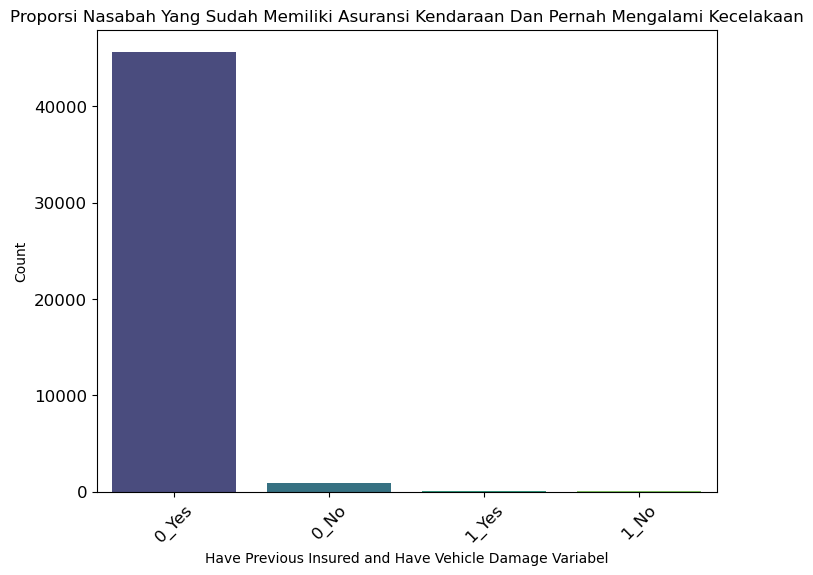

In [94]:
counts = df_filtered.groupby(['Previously_Insured', 'Vehicle_Damage']).size().unstack(fill_value=0)

counts = df_filtered['PrevInsured_VehicleDamage'].value_counts().reset_index()
counts.columns = ['PrevInsured_VehicleDamage', 'Count']

# Membuat diagram batang menggunakan Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(data=counts, x='PrevInsured_VehicleDamage', y='Count', palette='viridis')

plt.xlabel('Have Previous Insured and Have Vehicle Damage Variabel')
plt.ylabel('Count')
plt.title('Proporsi Nasabah Yang Sudah Memiliki Asuransi Kendaraan Dan Pernah Mengalami Kecelakaan')
plt.xticks(rotation=45)

plt.show()


In [96]:
df_filtered['AnnualPremium_PreviouslyInsured'].value_counts()

AnnualPremium_PreviouslyInsured
very-high_0    13857
high_0         11578
low_0          11211
medium_0        9906
low_1             50
high_1            47
medium_1          39
very-high_1       22
Name: count, dtype: int64

Text(0.5, 1.0, 'Proporsi Nasabah dengan Kelompok Premi Tahunan dan Sudah Memiliki Asuransi Kendaraan')

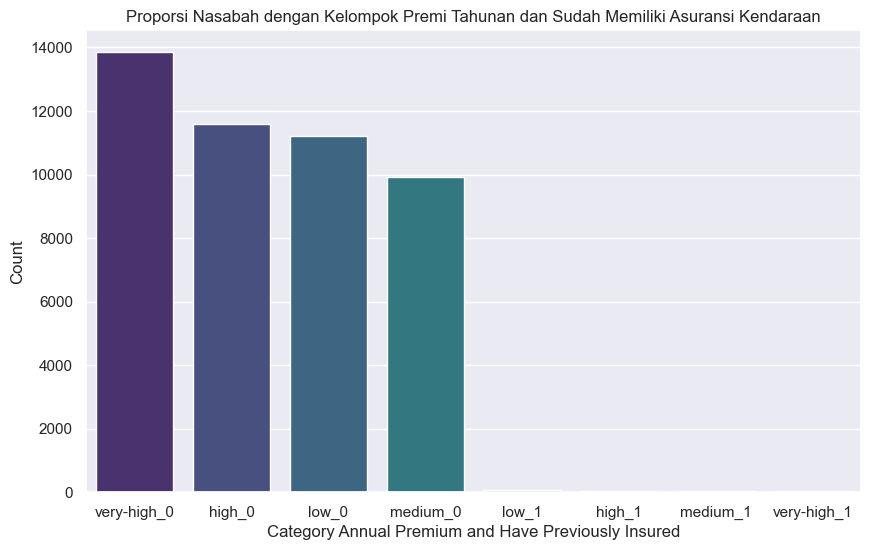

In [97]:
counts = df_filtered['AnnualPremium_PreviouslyInsured'].value_counts().reset_index()
counts.columns = ['AnnualPremium_PreviouslyInsured', 'Count']

# Membuat diagram batang menggunakan Seaborn
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
ax = sns.barplot(data=counts, x='AnnualPremium_PreviouslyInsured', y='Count', palette='viridis')

plt.xlabel('Category Annual Premium and Have Previously Insured')
plt.ylabel('Count')
plt.title('Proporsi Nasabah dengan Kelompok Premi Tahunan dan Sudah Memiliki Asuransi Kendaraan')

In [98]:
df_filtered['VehicleAge_VehicleDamage'].value_counts()

VehicleAge_VehicleDamage
1-2 Year_Yes     34210
< 1 Year_Yes      6816
> 2 Years_Yes     4702
1-2 Year_No        596
< 1 Year_No        386
Name: count, dtype: int64

Text(0.5, 1.0, 'Proporsi Nasabah dengan Kelompok Umur Kendaraan dan Pernah Mengalami Kecelakaan')

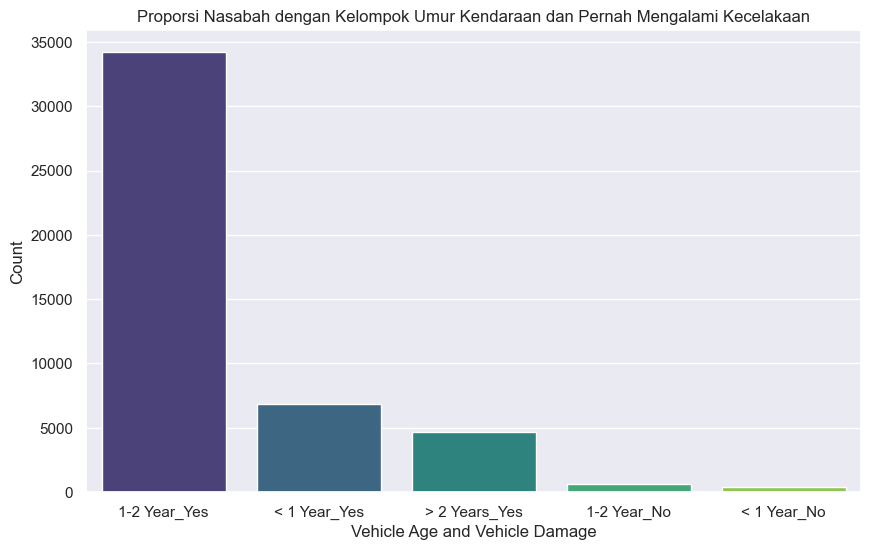

In [99]:
counts = df_filtered['VehicleAge_VehicleDamage'].value_counts().reset_index()
counts.columns = ['VehicleAge_VehicleDamage', 'Count']

# Membuat diagram batang menggunakan Seaborn
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
ax = sns.barplot(data=counts, x='VehicleAge_VehicleDamage', y='Count', palette='viridis')

plt.xlabel('Vehicle Age and Vehicle Damage')
plt.ylabel('Count')
plt.title('Proporsi Nasabah dengan Kelompok Umur Kendaraan dan Pernah Mengalami Kecelakaan')